<a href="https://colab.research.google.com/github/ChemistZee/ml_for_molecules/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Download the Binary labels of blood-brain barrier penetration dataset from moleculenet.org. To get the URL to the CSV file, you can hover over the download link and then copy the link address with right-click. Load the dataset into pandas dataframe and  -
1. analyze distribution of the target values (p_np) in the dataset. Are they evenly distributed?
2. analyze if the dataset contains neutral single molecules or ionic species with counter-ions
3. create a clean dataset with molecular weight of less than 750.




In [1]:
# import pandas

import pandas as pd
# create a pandas dataframe

df = pd.read_csv('https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv')
df.head(5)


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     2050 non-null   int64 
 1   name    2050 non-null   object
 2   p_np    2050 non-null   int64 
 3   smiles  2050 non-null   object
dtypes: int64(2), object(2)
memory usage: 64.2+ KB


<Axes: ylabel='Frequency'>

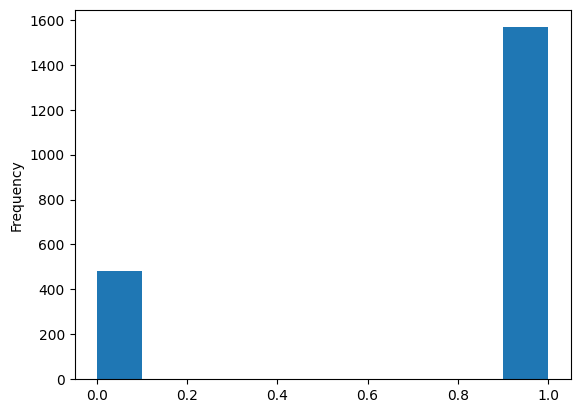

In [3]:
# 1. plot the distribution of target_values
df['p_np'].plot(kind ='hist')

In [5]:
# 2. visualize the 2D structure.
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 57.7 MB/s eta 0:00:00


In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

/usr/local/lib/python3.12/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:365: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


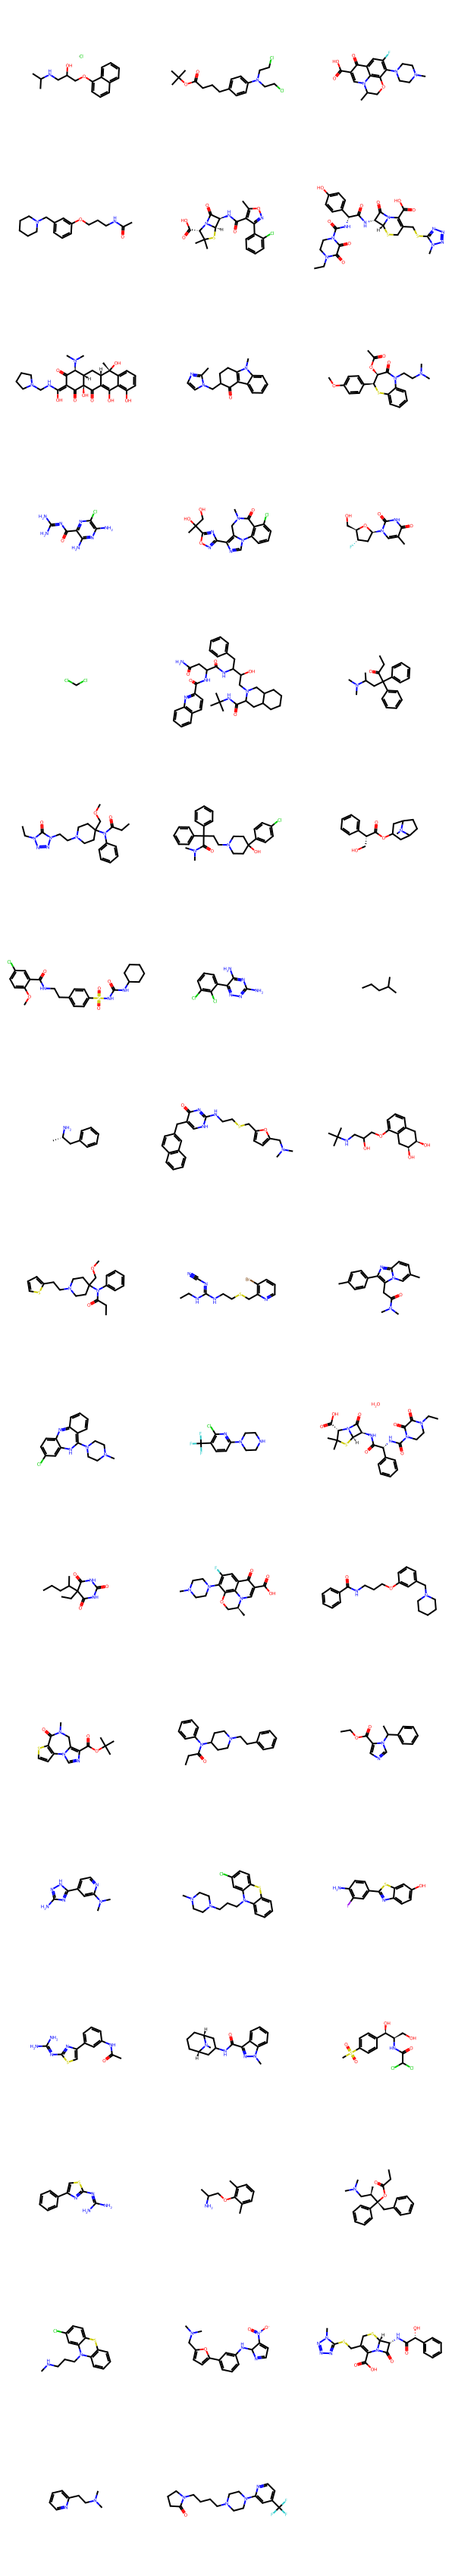

In [12]:
smiles_list = df['smiles'].tolist()
MolsToGridImage([Chem.MolFromSmiles(smile) for smile in smiles_list])

Hint: you will need to use RDKit and convert smiles to 2D image. You can use the method discussed in the lesson on Dataset or use PandasTools from RDKit. You can find the documentation [here](https://www.rdkit.org/docs/source/rdkit.Chem.PandasTools.html)

In [ ]:
# 3. Clean dataset with molecular weight less than 700

Hint: compute the molecular weight using RDKit function and apply pandas filter to get the dataset.

example: `df[df["mol_weight"] < 700]`

In [13]:
from rdkit.Chem import Descriptors

In [18]:
def calculate_molwt(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.ExactMolWt(mol)
    return None
df['molwt'] = df['smiles'].apply(calculate_molwt) #you can only apply a function

In [20]:
df['molwt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2050 entries, 0 to 2049
Series name: molwt
Non-Null Count  Dtype  
--------------  -----  
2039 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [25]:
clean_df = df[df['molwt']< 700] #df['molwt]<700 is the filter. By embedding it in df, we are sating apply this filter to df

In [26]:
clean_df

,num,name,p_np,smiles,molwt
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,294.126082
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,359.141884
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,361.143784
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,290.199428
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,435.065569
...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,274.950061
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,398.137239
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,322.142976
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,382.189257


In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     1985 non-null   int64  
 1   name    1985 non-null   object 
 2   p_np    1985 non-null   int64  
 3   smiles  1985 non-null   object 
 4   molwt   1985 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 93.0+ KB
